# Tutorial 2: Fourier interpolation

In this tutorial, we will be exploring the notion put forth in the lecture that a Fourier analysis is actually an interpolation scheme. This is often called trigonometric interpolation or Fourier interpolation. In particular, we will discuss an important implication of this: The phenomenom of Gibbs ringing, and what it means for computing a Fourier derivative.

## Discrete Fourier transform

We will be using the discrete Fourier transform (DFT) here as an approximation for the Fourier analysis that works on digital computers.
The discrete Fourier transform maps a discrete function in real-space onto a discrete function in reciprocal space.
It is the only of the set of transforms that we can use on a computer that works intrinsically with a set of discrete numbers.

Remember the Fourier series, $f(x) = \frac{1}{L}\sum_{k=-\infty}^{\infty} (c_k\Delta x) e^{i q_k x}$
that gives a continuous function $f(x)$.
The coefficients are obtained by projecting the function $f(x)$ on the basis vectors $\varphi_k(x)=e^{-i q_k x}$, $c_k \Delta x = \int_0^L \text{d}x \, f(x) e^{-i q_k x}$.
We now evaluate this continuous function at a discrete set of $N$ equally-spaced points, $x_l=l \Delta x$ with $\Delta x=L/N$, indicated by the red crosses in the figure below.
(Note that here the Fourier series is defined such that the $c_k$ are the proper coefficients of the discrete Fourier transform, hence the factor $\Delta x/L=1/N$.)

Text(0.5, 1.0, 'A discretely sampled continuous function')

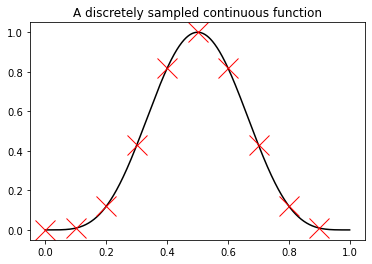

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
f = lambda x: np.sin(np.pi*x)**4
plt.plot(x, f(x), 'k-')
plt.plot(sample_points, f(sample_points), 'rx', ms=20)
plt.title('A discretely sampled continuous function')

The discrete Fourier transforms expresses a discrete function as:

$$ \begin{equation} f(x_l) = \frac{1}{N}\sum_{k=0}^{N-1} c_k e^{i q_k x_l} \end{equation} $$

where $x_l = l \Delta x$ is now discretized on a grid with spacing $\Delta x$ (see red data points in the above figure) and $q_k = k \Delta q$ is “discretized” as in the normal Fourier series with $\Delta q = 2\pi/L$.

Note that the overall length of the periodic domain if $L=\Delta x N$ and sum in Eq. (1) now runs from $0$ to $N-1$.

The coefficient are obtained by $c_k = \sum_{l=0}^{N-1} f(x_l) e^{-i q_k x_l}$.

It is important to realize that in this formulation, the length $L$ drops out.

We have $q_k x_l=kl \Delta x \Delta q = 2\pi k l / N$.

We then obtain $f(x_l) =\frac{1}{N} \sum_{k=0}^{N-1} c_k e^{i 2\pi k l/N}$ and $c_k = \sum_{l=0}^{N-1} f(x_l) e^{-i 2\pi k l/N}$.

This is the formulation that can be for example found in the documentation of numpy’s FFT module.
(This module computes these function for you, but it may make sense if you implement them yourselves for this exercise.)
We can think of the discrete Fourier transforms as if the length of our domain is given by the number of grid points, $L=N$.
In general, care must be taken that units are converted correctly when solving physical problems.

## Fourier interpolation

The function $f(x_l)$ in Eq. (1) is defined at discrete grid points but we can evaluate Eq. (1) for any value $x$ (since it is a continuous function). E.g. in the above figure, the points $(x_l, f(x_l))$ are given by the red crosses, but the full function $f(x)$ is the black line. Obtaining $f(x)$ from the (truncated) Fourier representation is called Fourier interpolation. This exercise is intended to give you a feeling of what Fourier interpolation means and what a Fourier interpolated function (and its derivatives) look like.

We suggest to explore Fourier interpolation for four types of functions:

* A sine that is periodic on the domain $L$
* A polynomial function of the form $f(x)=(x-x_0)^2$ where $x_0=L/2$ is the center of your interval.
* A step function
* A sawtooth function

Of course, feel free to evaluate other functions as well.


Text(0.5, 1.0, 'A discretely sampled continuous function')

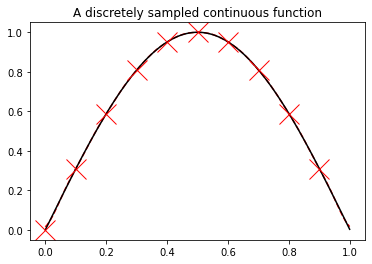

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
f_1 = lambda x: np.sin(np.pi*x)

A0 = np.sum(f_1(x) * np.ones_like(x)) * dx
fFS = A0/2

upper_limit = 20
A = np.zeros(upper_limit)
B = np.zeros(upper_limit)
for k in range(upper_limit):
    A[k] = np.sum(f_1(x) * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f_1(x) * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)

plt.plot(x, fFS, 'r--')
plt.plot(x, f_1(x), 'k-')
plt.plot(sample_points, f_1(sample_points), 'rx', ms=20)
plt.title('A discretely sampled continuous function')

Text(0.5, 1.0, 'A discretely sampled continuous function')

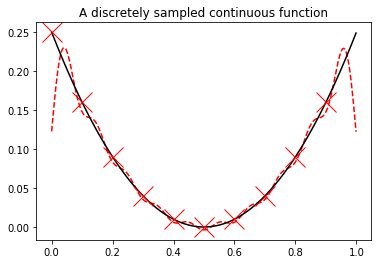

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
x_0 = L/2
f_2 = lambda x: (x-x_0)**2

A0 = np.sum(f_2(x) * np.ones_like(x)) * dx
fFS = A0/2

upper_limit = 20
A = np.zeros(upper_limit)
B = np.zeros(upper_limit)
for k in range(upper_limit):
    A[k] = np.sum(f_2(x) * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f_2(x) * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
plt.plot(x, fFS, 'r--')

plt.plot(x, f_2(x), 'k-')
plt.plot(sample_points, f_2(sample_points), 'rx', ms=20)
plt.title('A discretely sampled continuous function')

Text(0.5, 1.0, 'A discretely sampled continuous function')

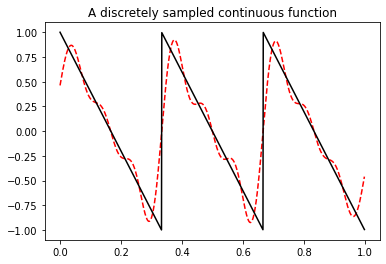

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
f_3 = lambda x: sp.signal.sawtooth(1*np.pi*6*x, 0)

A0 = np.sum(f_3(x) * np.ones_like(x)) * dx
fFS = A0/2

upper_limit = 20
A = np.zeros(upper_limit)
B = np.zeros(upper_limit)
for k in range(upper_limit):
    A[k] = np.sum(f_3(x) * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f_3(x) * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
plt.plot(x, fFS, 'r--')

plt.plot(x, f_3(x), 'k-')
# plt.plot(sample_points, f_3(sample_points), 'rx', ms=20)
plt.title('A discretely sampled continuous function')

Text(0.5, 1.0, 'A discretely sampled continuous function')

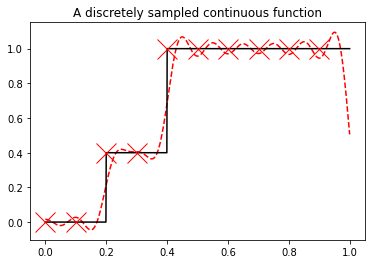

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
x_0 = L/2
f_4_e = lambda x: 0 if x < 0.2 else (0.4 if x < 0.4 else 1)
f_4 = lambda x: [0 if x < 0.2 else (0.4 if x < 0.4 else 1) for x in x]


A0 = np.sum(f_4(x) * np.ones_like(x)) * dx
fFS = A0/2

upper_limit = 20
A = np.zeros(upper_limit)
B = np.zeros(upper_limit)
for k in range(upper_limit):
    A[k] = np.sum(f_4(x) * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f_4(x) * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
plt.plot(x, fFS, 'r--')

plt.plot(x, f_4(x), 'k-')

# plt.plot(x, [f_4(x) for x in x] , 'k-')
plt.plot(sample_points, f_4(sample_points), 'rx', ms=20)
plt.title('A discretely sampled continuous function')

### Task: Plot the function and its Fourier interpolation

In order to say something about interpolation, we need to turn the function into a discrete description.

Discretize the function above into $N$ grid points (a parameter that you can play with) and then plot the discrete variant in combination with its Fourier interpolated variant, i.e. the discrete Fourier series of that function evaluated at a much finer grid.

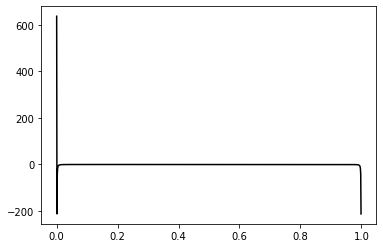

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
# f_1 = lambda x: np.sin(np.pi*x)
fft_f = lambda x: np.fft.fft(f_1(x)).real
plt.plot(x, fft_f(x), 'k-')
# plt.plot(sample_points, f(sample_points), 'rx', ms=20)
# plt.title('A discretely sampled continuous function')

Text(0.5, 1.0, 'A discretely sampled continuous function')

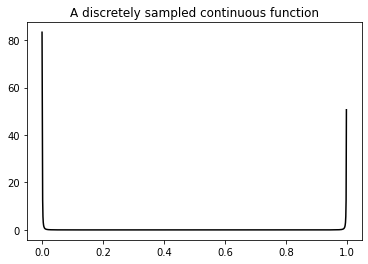

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
x_0 = L/2
# f_2 = lambda x: (x-x_0)**2
fft_f = lambda x: np.fft.fft(f_2(x)).real
plt.plot(x, fft_f(x), 'k-')
# plt.plot(sample_points, f_2(sample_points), 'rx', ms=20)
plt.title('A discretely sampled continuous function')

Text(0.5, 1.0, 'A discretely sampled continuous function')

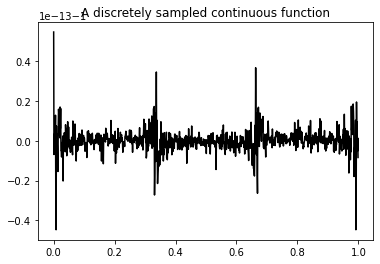

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal as spsignal

L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
x_0 = L/2
# f_3 = lambda x: sp.signal.sawtooth(2*np.pi*3*x)
fft_f = lambda x: np.fft.fft(f_3(x)).real
plt.plot(x, fft_f(x), 'k-')
# plt.plot(sample_points, f_3(sample_points), 'rx', ms=20)
plt.title('A discretely sampled continuous function')

<function <lambda> at 0x0000016A618B60D0>


Text(0.5, 1.0, 'A discretely sampled continuous function')

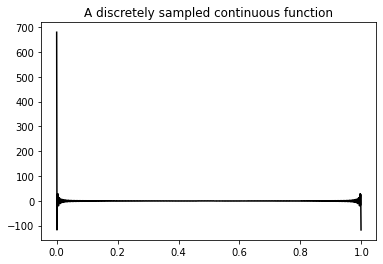

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
x_0 = L/2
f_4_e = lambda x: 0 if x < 0.2 else (0.4 if x < 0.4 else 1)
f_4 = lambda x: [0 if x < 0.2 else (0.4 if x < 0.4 else 1) for x in x]
# f_4 = lambda x: np.fft.fft([0 if i < 0.2 else (0.4 if i < 0.4 else 1) for i in x]).real
print(fft_f)
fft_f = np.fft.fft(f_4(x)).real
# fft_set = [fft_f(x) for x in x]
plt.plot(x, fft_f, 'k-')
# plt.plot(sample_points, f_4(sample_points), 'rx', ms=20)
plt.title('A discretely sampled continuous function')

## Fourier derivative

We can compute the derivative of a Fourier representation of a function simply by taking the derivatives of the exponential basis function.

For example, given Eq. (1) we can compute the derivative $f'(x_l) = \frac{1}{N} \sum_{k=0}^{N-1} i q_k c_k e^{i q_k x_l}$.

Note that this is the derivative of the Fourier interpolated function.

The Fourier transform of the derivative of a function is therefore $i q_k c_k$, given the Fourier transform (coefficients) $c_k$ of the function itself.

The gradient operation in reciprocal space is hence a multiplication with the (complex) number $D_k = iq_k$.

We have transformed a differential operator into an algrebraic expression (that our computer can work with).

### Task 1: Plot the derivative of the functions above

Plot the full (Fourier interpolated) derivative of the functions above. What do you see?

### Task 2: Finite differences

Compare the Fourier derivative to the derivative obtained from a difference quotient (also called a finite-differences approximation)

$f’(x_l) = \frac{f(x_{l+1})-f(x_l)}{\Delta x}.$

What do you see?

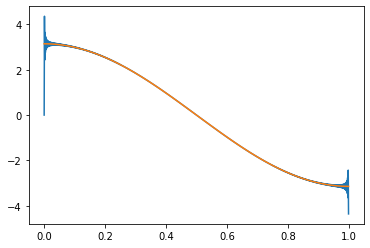

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
f_1 = lambda x: np.sin(np.pi*x)
df_1 = lambda x: np.pi*np.cos(np.pi*x)


finite_diff = np.zeros(N)
for i in range(len(finite_diff)):
    finite_diff[i] = (f_1(i+1) - f_1(i))/dx


f_hat = np.fft.fft(f_1(x))
kappa = (2*np.pi/L)*x #q_k
kappa = np.fft.fftshift(kappa)
dfhat = kappa * f_hat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))*N

# print(dfFFT.real)

plt.plot(x, dfFFT)
plt.plot(x, df_1(x))
# plt.plot(x, finite_diff)

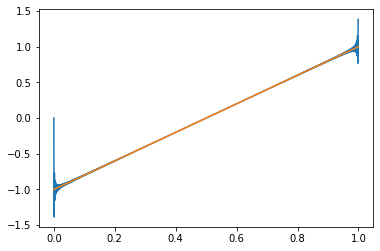

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
x_0 = L/2
f_2 = lambda x: (x-x_0)**2
df_2 = lambda x: 2*(x-x_0)

finite_diff = np.zeros(N)
for i in range(len(finite_diff)):
    finite_diff[i] = (f_2(i+1) - f_2(i))/dx

f_hat = np.fft.fft(f_2(x))
kappa = (2*np.pi/L)*x
kappa = np.fft.fftshift(kappa)
dfhat = kappa * f_hat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))*N

plt.plot(x, dfFFT.real)
plt.plot(x, df_2(x))
# plt.plot(x, finite_diff)

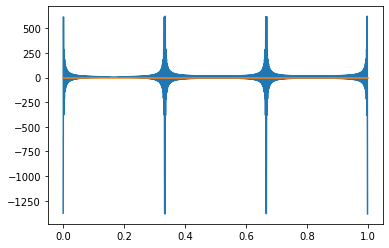

In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
x_0 = L/2
f_3 = lambda x: sp.signal.sawtooth(2*np.pi*3*x, 1)
# df_3 = lambda x: 2*np.pi*3*sp.signal.sawtooth(2*np.pi*3*x, 0)

#finite_diff = np.zeros(N)
#for i in range(len(finite_diff)):
#    finite_diff[i] = (f_3(i+1) - f_3(i))/dx


f_hat = np.fft.fft(f_3(x))

kappa = (2*np.pi/L)*x
kappa = np.fft.fftshift(kappa)
dfhat = kappa * f_hat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))*N

# plt.plot(x, df_3(x))
plt.plot(x, dfFFT.real)
plt.plot(x, finite_diff)

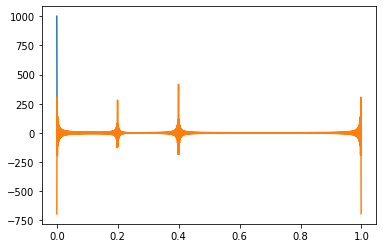

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
L = 1
N = 1000
dx = L/N
x = np.arange(N)*dx
sample_points = x[::100] # Sample every 100th point
x_0 = L/2
f_4_e = lambda x: 0 if x < 0.2 else (0.4 if x < 0.4 else 1)
f_4 = lambda x: [0 if x < 0.2 else (0.4 if x < 0.4 else 1) for x in x]


finite_diff = np.zeros(N)
for i in range(len(finite_diff)-1):
    finite_diff[i] = (f_4_e(i+1) - f_4_e(i))/dx


f_hat = np.fft.fft(f_4(x))
kappa = (2*np.pi/L)*x
kappa = np.fft.fftshift(kappa)
dfhat = kappa * f_hat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))*N


plt.plot(x, finite_diff)
plt.plot(x, dfFFT.real)